In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error

In [2]:
df = pd.read_csv('joblisting.csv')
df.head(50)

,Unnamed: 0,company,job title,headquarters,salary estimate,job type,size,founded,type,industry,sector,revenue,job description
0,0,Walmart\n3.4,Data Scientist,"Sunnyvale, CA",-1,Job Type : N/A,10000+ employees,1994,company - public,general merchandise & superstores,retail,$10+ billion (usd),Position Summary...\nWhat you'll do...\nAnalyt...
1,1,TikTok\n3.8,Data Scientist,"Mountain View, CA",-1,Job Type : Full-time,501 to 1000 employees,2016,company - private,internet,information technology,unknown / non-applicable,TikTok is the leading destination for short-fo...
2,2,Indeed\n4.3,Principal Data Scientist - Candidate Recommend...,"San Francisco, CA",Employer Provided Salary:$187K - $231K,Job Type : Full-time,10000+ employees,2004,company - private,internet,information technology,$2 to $5 billion (usd),Your Job\nThe Candidate Recommendations team b...
3,3,Indeed\n4.3,Senior Data Scientist - Moderation Engineering,"San Francisco, CA",Employer Provided Salary:$130K - $156K,Job Type : Full-time,10000+ employees,2004,company - private,internet,information technology,$2 to $5 billion (usd),Your Job\nThe Moderation Engineering team’s mi...
4,4,Thermo Fisher - America\n3.8,Data Scientist III,"San Francisco, CA",-1,Job Type : N/A,10000+ employees,1902,company - public,biotech & pharmaceuticals,biotech & pharmaceuticals,$10+ billion (usd),Thermo Fisher Scientific Inc. is the world lea...
5,5,PrimeNeuro,Data Scientist,"San Francisco, CA",Employer Provided Salary:$95K - $105K,Job Type : Full-time,-1,-1,-1,-1,-1,-1,Clinical Data Scientist\nJob Summary\nDo you k...
6,6,"Grammarly, Inc.\n5.0",Data Scientist,"San Francisco, CA",-1,Job Type : N/A,201 to 500 employees,2009,company - private,internet,information technology,unknown / non-applicable,Grammarly is continuing to grow our team durin...
7,7,Salesforce\n4.5,Data Science Engineer,"San Francisco, CA",-1,Job Type : Full-time,10000+ employees,1999,company - public,computer hardware & software,information technology,$10+ billion (usd),"To get the best candidate experience, please c..."
8,8,Carta\n4.0,Data Scientist,"San Francisco, CA",-1,Job Type : N/A,501 to 1000 employees,2012,company - private,venture capital & private equity,finance,unknown / non-applicable,The Company You’ll Join\nAt Carta we create ow...
9,9,Salesforce\n4.5,"Data Scientist, Data Intelligence","San Francisco, CA",-1,Job Type : Full-time,10000+ employees,1999,company - public,computer hardware & software,information technology,$10+ billion (usd),"To get the best candidate experience, please c..."


## Data Cleaning!

things I'm planning to do:

+ parsing 'job description'(python etc.)
+ parsing salary and turning Dtype to int
+ deleting rows where salary estimate is -1
+ parsing headquarters into state/city
+ parsing company size and turning Dtype to int
+ removing \n and numbers from company names
+ removing 'job type:' from job type column
+ turn 'founded' column into company age
+ something magical about 'revenue' which idk yet ¯\_(ツ)_/¯
+ parsing job title 

###### deleting all rows where salary estimate is -1 (which is null)

In [3]:
df = df.drop(['Unnamed: 0'], axis = 1)

nullEst = df[df['salary estimate'] == '-1'].index
df.drop(nullEst, inplace = True)

###### removing 'job type:' from job type column

In [4]:
df['job type']= df['job type'].str.lstrip('Job Type :')
df['job type'].unique()

array(['Full-time', 'N/A', 'Part-time', 'Contract', 'Internship',
       'mporary'], dtype=object)

###### removing rows where job type is 'mporary'

In [5]:
mporary = df[df['job type'] == 'mporary'].index
df.drop(mporary, inplace = True)

##### removing \n and numbers from company names

In [6]:
df['company']= df["company"].str.split('\n', n = 1, expand = True)[0]

##### parsing salary estimate

In [7]:
df["salary estimate"].unique()

array(['Employer Provided Salary:$187K - $231K',
       'Employer Provided Salary:$130K - $156K',
       'Employer Provided Salary:$95K - $105K',
       'Employer Provided Salary:$190K',
       'Employer Provided Salary:$120K - $160K',
       'Employer Provided Salary:$115K', '$99K - $170K (Glassdoor est.)',
       '$94K - $169K (Glassdoor est.)', '$108K - $197K (Glassdoor est.)',
       '$91K - $151K (Glassdoor est.)', '$63K - $133K (Glassdoor est.)',
       '$85K - $174K (Glassdoor est.)', '$126K - $222K (Glassdoor est.)',
       '$75K - $162K (Glassdoor est.)', '$85K - $177K (Glassdoor est.)',
       '$82K - $173K (Glassdoor est.)', '$101K - $179K (Glassdoor est.)',
       '$96K - $154K (Glassdoor est.)', '$107K - $186K (Glassdoor est.)',
       '$98K - $198K (Glassdoor est.)', '$100K - $170K (Glassdoor est.)',
       '$71K - $174K (Glassdoor est.)', '$85K - $169K (Glassdoor est.)',
       '$43K - $79K (Glassdoor est.)', '$75K - $157K (Glassdoor est.)',
       '$115K - $163K (Glassd

adding 'hourly' column

In [8]:
df["hourly"] = df["salary estimate"].apply(lambda x: 1 if 'per hour' in x.lower() else 0)

'(Glassdoor est.)', 'Per Hour(Glassdoor est.)', 'Employer Provided Salary:' strings will be removed.

In [9]:
df["salary estimate"]= df["salary estimate"].str.strip('(Glassdoor est.) Employer Provided Salary:Per Hour(Glassdoor est.) ')

dropping rows where salary estimate is 'Mountain View, CA' and 'n Francisco, CA'

In [10]:
dropsest = df[(df['salary estimate'] == 'Mountain View, CA') | (df['salary estimate'] == 'n Francisco, CA')].index
df.drop(dropsest, inplace = True)
df["salary estimate"].unique()

array(['$187K - $231K', '$130K - $156K', '$95K - $105K', '$190K',
       '$120K - $160K', '$115K', '$99K - $170K', '$94K - $169K',
       '$108K - $197K', '$91K - $151K', '$63K - $133K', '$85K - $174K',
       '$126K - $222K', '$75K - $162K', '$85K - $177K', '$82K - $173K',
       '$101K - $179K', '$96K - $154K', '$107K - $186K', '$98K - $198K',
       '$100K - $170K', '$71K - $174K', '$85K - $169K', '$43K - $79K',
       '$75K - $157K', '$115K - $163K', '$80K - $151K', '$94K - $130K',
       '$127K - $201K', '$83K - $159K', '$82K - $167K', '$76K - $156K',
       '$79K - $161K', '$90K - $174K', '$92K - $160K', '$88K - $172K',
       '$110K - $216K', '$84K - $175K', '$95K - $163K', '$93K - $170K',
       '$77K - $173K', '$90K - $170K', '$80K - $154K', '$77K - $148K',
       '$84K - $154K', '$141K - $155K', '$96K - $182K', '$113K - $210K',
       '$111K - $185K', '$84K - $179K', '$91K - $164K', '$86K - $156K',
       '$82K - $164K', '$86K - $174K', '$87K - $154K', '$121K - $195K',
      

removing 'K' and '$'

In [11]:
df["salary estimate"]= df["salary estimate"].apply(lambda x: x.replace('K','').replace('$',''))

###### adding columns for min and max salary

In [12]:
new = df["salary estimate"].str.split(" - ", n = 1, expand = True)
df["min_salary"] = new[0]
df["max_salary"] = new[1]
df["max_salary"] = pd.to_numeric(df["max_salary"], errors='coerce').fillna(0, downcast='infer')
df["min_salary"] = pd.to_numeric(df["min_salary"], errors='coerce').fillna(0, downcast='infer')

filling rows where there is only one salary estimate

In [13]:
df.loc[df['max_salary'] != 0, ['max_salary']] = df['max_salary']
df.loc[df['max_salary'] == 0, ['max_salary']] = df['min_salary']

creating a column for average salary

In [14]:
df["average_salary"] = (df["min_salary"]+df["max_salary"])/2

turning hourly into annual salary

In [15]:
df['max_salary'] = df.apply(lambda x: x.max_salary*2 if x.hourly == 1 else x.max_salary,axis =1)
df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.hourly == 1 else x.min_salary,axis =1)

###### parsing headquarters into state/city

In [16]:
df['city'] = df['headquarters'].apply(lambda x: x.split(',')[0])
df['state'] = df['headquarters'].apply(lambda x: x.split(',')[1])

###### turn 'founded' column into company age

In [17]:
df['company age'] = df.founded.apply(lambda x: x if x == -1 else 2022-x)

###### parsing 'job description'(python etc.)

In [18]:
df["python"] = df["job description"].apply(lambda x: 1 if 'python' in x.lower() else 0)
df["R"] = df["job description"].apply(lambda x: 1 if 'r studio' in x.lower() else 0)
df["spark"] = df["job description"].apply(lambda x: 1 if 'spark' in x.lower() else 0)
df["aws"] = df["job description"].apply(lambda x: 1 if 'aws' in x.lower() else 0)
df["excel"] = df["job description"].apply(lambda x: 1 if 'excel' in x.lower() else 0)

###### parsing company size and turning Dtype to int

In [19]:
df["size"].unique()

array(['10000+ employees', '-1', '51 to 200 employees',
       '1 to 50 employees', '201 to 500 employees', 'unknown',
       '1001 to 5000 employees', '501 to 1000 employees',
       '5001 to 10000 employees'], dtype=object)

In [20]:
df["size"]= df["size"].apply(lambda x: x.replace('employees','').replace('to','-'))
df["size"].unique()

array(['10000+ ', '-1', '51 - 200 ', '1 - 50 ', '201 - 500 ', 'unknown',
       '1001 - 5000 ', '501 - 1000 ', '5001 - 10000 '], dtype=object)

I'll put company size to a 1-7 scale where 1 is 1-50 and 7 is 10000+, and turn unknown to -1

In [21]:
df["size"]= df["size"].apply(lambda x: x.replace('10000+ ','7').replace('5001 - 10000 ','6').replace('1001 - 5000 ','5').replace('501 - 1000 ','4').replace('201 - 500 ','3').replace('51 - 200 ','2').replace('1 - 50 ','1').replace('unknown','-1'))

In [22]:
df['size'].astype(int)

2       7
3       7
5      -1
18      2
24      1
       ..
2566    7
2568    5
2569   -1
2570    3
2571    2
Name: size, Length: 2093, dtype: int32

###### parsing revenue

In [23]:
df["revenue"].unique()

array(['$2 to $5 billion (usd)', '-1', '$25 to $50 million (usd)',
       'unknown / non-applicable', '$10+ billion (usd)',
       'less than $1 million (usd)', '$10 to $25 million (usd)',
       '$100 to $500 million (usd)', '$5 to $10 million (usd)',
       '$500 million to $1 billion (usd)', '$1 to $5 million (usd)',
       '$50 to $100 million (usd)', '$1 to $2 billion (usd)',
       '$5 to $10 billion (usd)'], dtype=object)

In [24]:
df["revenue"]=df["revenue"].apply(lambda x: x.replace('$','').replace('to','-').replace('billion (usd)','$B').replace('million (usd)','$M').replace('-1','unknown').replace('unknown / non-applicable','unknown'))
df["revenue"]=df["revenue"].apply(lambda x: x.replace('unknown', '0'))
    

In [25]:
df["revenue"].unique()

array(['2 - 5 $B', '0', '25 - 50 $M', '10+ $B', 'less than 1 $M',
       '10 - 25 $M', '100 - 500 $M', '5 - 10 $M', '500 million - 1 $B',
       '1 - 5 $M', '50 - 100 $M', '1 - 2 $B', '5 - 10 $B'], dtype=object)

creating a column for average revenue

In [26]:
def formatrevenue(revenue):
    if '500 million - 1 $B' in revenue:
        return 750000000
    elif '10+ $B' in revenue:
        return 1000000000
    elif 'less than 1 $M' in revenue:
        return 1000000
    elif '$M' in revenue:
        revenue = revenue.replace(' $M','').split(' - ')
        x = revenue[0]
        y = revenue[1]
        x = pd.to_numeric(x, errors='coerce')#.fillna(0, downcast='infer')
        y = pd.to_numeric(y, errors='coerce')#.fillna(0, downcast='infer')
        return ((y+x)/2)*1000000
    elif '$B' in revenue:
        revenue = revenue.replace(' $B','').split(' - ')
        x = revenue[0]
        y = revenue[1]
        x = pd.to_numeric(x, errors='coerce')#.fillna(0, downcast='infer')
        y = pd.to_numeric(y, errors='coerce')#.fillna(0, downcast='infer')
        return ((y+x)/2)*1000000000


In [27]:
df["average_revenue"] = df["revenue"].apply(formatrevenue)

###### parsing job title

In [28]:
def re_title(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'Na'

In [29]:
def seniority(title):
    if 'sr' in title.lower() or 'sr.' in title.lower() or 'senior' in title.lower() or 'lead' in title.lower() or 'principal'in title.lower():
        return 'senior'
    elif 'jr'in title.lower() or 'junior' in title.lower() or 'jr.' in title.lower() or 'entry' in title.lower():
        return 'jr'
    else:
        return 'Na'

In [30]:
df['title'] = df['job title'].apply(re_title)
df['position'] = df['job title'].apply(seniority)

In [31]:
pd.set_option('display.max_columns', None)
df.head()

,company,job title,headquarters,salary estimate,job type,size,founded,type,industry,sector,revenue,job description,hourly,min_salary,max_salary,average_salary,city,state,company age,python,R,spark,aws,excel,average_revenue,title,position
2,Indeed,Principal Data Scientist - Candidate Recommend...,"San Francisco, CA",187 - 231,Full-time,7,2004,company - private,internet,information technology,2 - 5 $B,Your Job\nThe Candidate Recommendations team b...,0,187,231,209.0,San Francisco,CA,18,0,0,0,0,0,3.500000e+09,data scientist,senior
3,Indeed,Senior Data Scientist - Moderation Engineering,"San Francisco, CA",130 - 156,Full-time,7,2004,company - private,internet,information technology,2 - 5 $B,Your Job\nThe Moderation Engineering team’s mi...,0,130,156,143.0,San Francisco,CA,18,0,0,0,0,0,3.500000e+09,data scientist,senior
5,PrimeNeuro,Data Scientist,"San Francisco, CA",95 - 105,Full-time,-1,-1,-1,-1,-1,0,Clinical Data Scientist\nJob Summary\nDo you k...,0,95,105,100.0,San Francisco,CA,-1,0,0,0,0,0,NaN,data scientist,Na
18,Harnham US,"Computational Chemistry, Machine Learning Scie...","San Francisco, CA",190,N/A,2,2006,company - private,staffing & outsourcing,business services,25 - 50 $M,THE COMPANY\nThis pharmaceutical startup is re...,0,190,190,190.0,San Francisco,CA,16,1,0,0,0,0,3.750000e+07,mle,Na
24,Abl Schools,Abl Schools | Data Scientist,"San Francisco, CA",120 - 160,Full-time,1,2018,company - private,consulting,business services,0,Overview\nAbl believes every student deserves ...,0,120,160,140.0,San Francisco,CA,4,0,0,0,0,0,NaN,data scientist,Na


In [32]:
df.to_csv('joblisting_cleaned.csv', index =False)

## Explatory Data Analysis

In [33]:
df = pd.read_csv('joblisting_cleaned.csv')

In [34]:
df.describe()

,size,founded,hourly,min_salary,max_salary,average_salary,company age,python,R,spark,aws,excel,average_revenue
count,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,1.105000e+03
mean,3.737697,1512.342093,0.002389,93.245581,168.703297,130.902293,24.207358,0.175346,0.003822,0.071190,0.055901,0.113712,1.254312e+09
std,2.713450,850.961215,0.048830,22.128144,30.191064,24.774222,37.065365,0.380354,0.061721,0.257203,0.229785,0.317537,1.672264e+09
min,-1.000000,-1.000000,0.000000,18.000000,50.000000,24.500000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+06
25%,1.000000,1853.000000,0.000000,80.000000,152.000000,116.500000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000e+08
50%,4.000000,1998.000000,0.000000,93.000000,171.000000,133.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+09
75%,7.000000,2010.000000,0.000000,105.000000,189.000000,147.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+09
max,7.000000,2019.000000,1.000000,190.000000,261.000000,209.000000,192.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.500000e+09


In [35]:
df.columns

Index(['company', 'job title', 'headquarters', 'salary estimate', 'job type',
       'size', 'founded', 'type', 'industry', 'sector', 'revenue',
       'job description', 'hourly', 'min_salary', 'max_salary',
       'average_salary', 'city', 'state', 'company age', 'python', 'R',
       'spark', 'aws', 'excel', 'average_revenue', 'title', 'position'],
      dtype='object')

<AxesSubplot:>

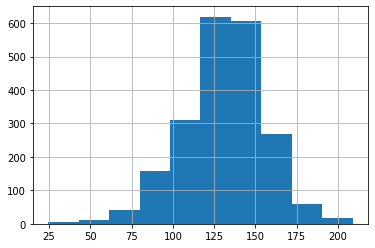

In [36]:
df["average_salary"].hist()

<AxesSubplot:>

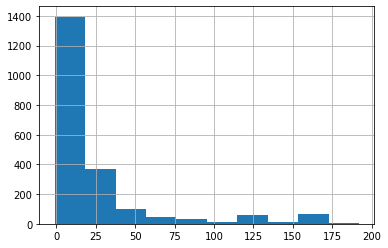

In [37]:
df["company age"].hist()

<AxesSubplot:>

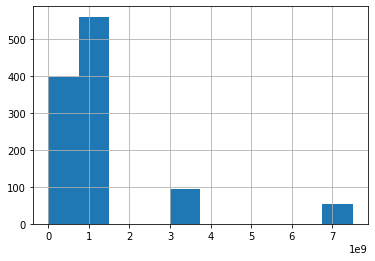

In [38]:
df['average_revenue'].hist()

<AxesSubplot:>

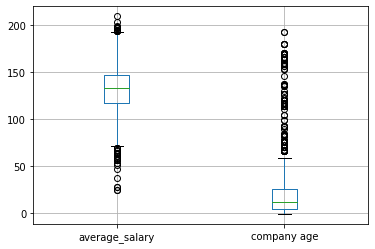

In [39]:
df.boxplot(column=['average_salary', 'company age'])  

<AxesSubplot:>

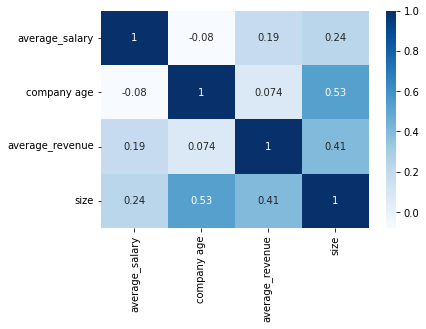

In [40]:
corr = df[['average_salary','company age','average_revenue','size']].corr()
sns.heatmap(corr, cmap="Blues", annot=True)

In [41]:
df.columns

Index(['company', 'job title', 'headquarters', 'salary estimate', 'job type',
       'size', 'founded', 'type', 'industry', 'sector', 'revenue',
       'job description', 'hourly', 'min_salary', 'max_salary',
       'average_salary', 'city', 'state', 'company age', 'python', 'R',
       'spark', 'aws', 'excel', 'average_revenue', 'title', 'position'],
      dtype='object')

In [42]:
df_cat = df[['type','company','revenue','size','industry','sector','city','python','R','spark','aws','excel','title','position']]

graph for type: 
total = 13 


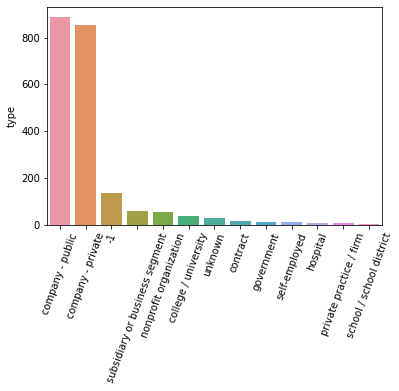

graph for company: 
total = 587 


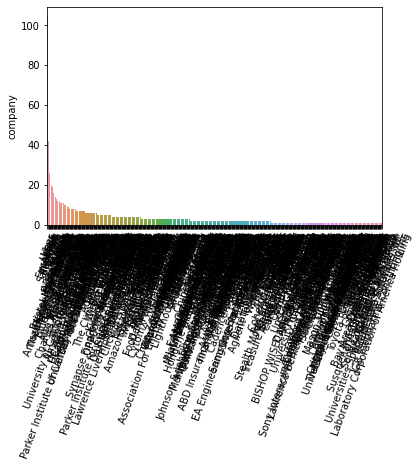

graph for revenue: 
total = 13 


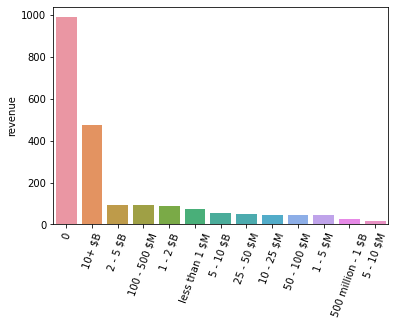

graph for size: 
total = 8 


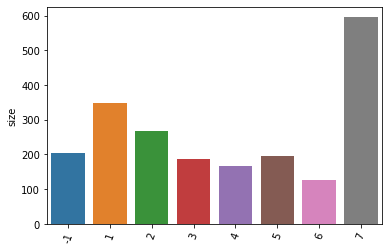

graph for industry: 
total = 64 


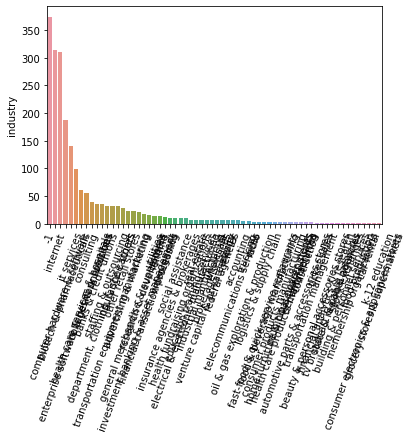

graph for sector: 
total = 23 


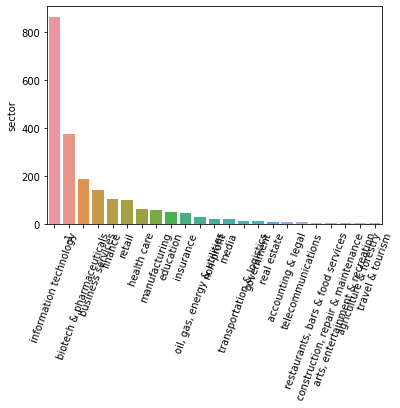

graph for city: 
total = 59 


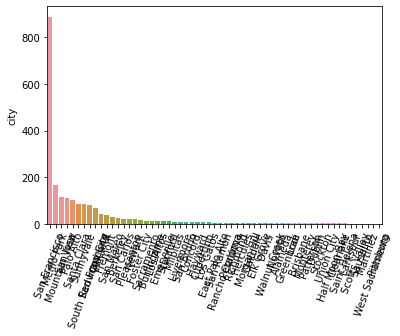

graph for python: 
total = 2 


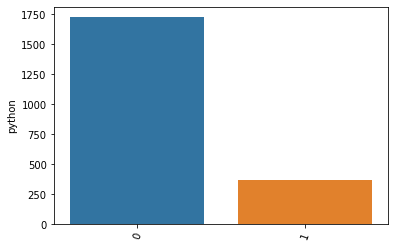

graph for R: 
total = 2 


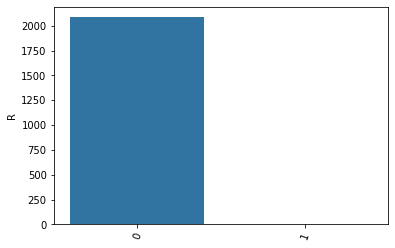

graph for spark: 
total = 2 


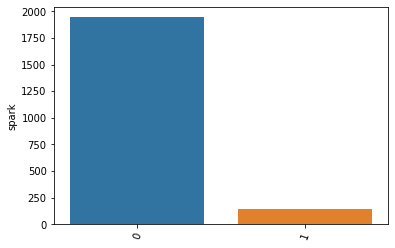

graph for aws: 
total = 2 


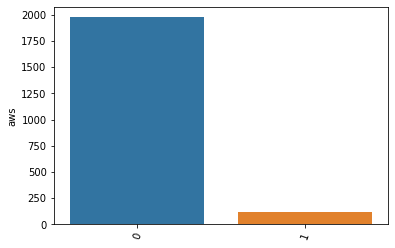

graph for excel: 
total = 2 


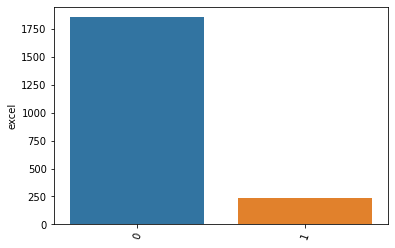

graph for title: 
total = 7 


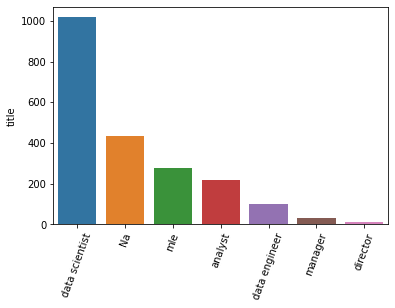

graph for position: 
total = 3 


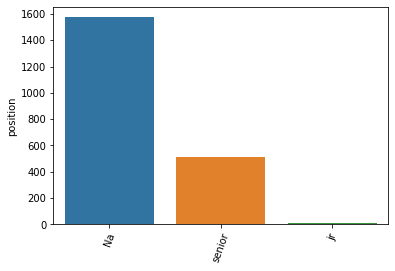

In [43]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: \ntotal = %d "% (i,len(cat_num)))
    sns.barplot(x=cat_num.index, y=cat_num)
    plt.xticks(rotation=70)
    plt.show()

graph for company: 
total = 20 


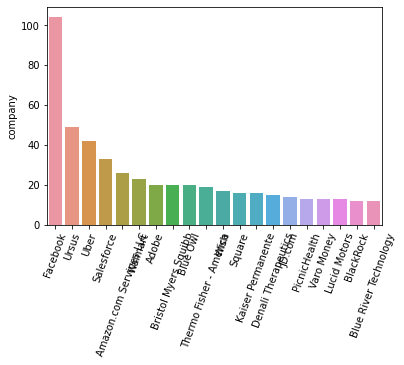

graph for revenue: 
total = 13 


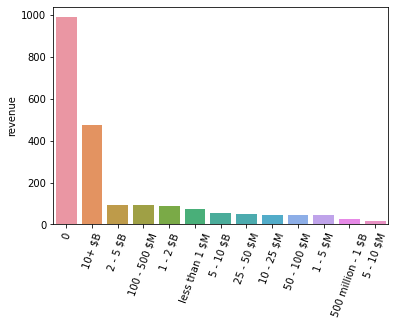

graph for industry: 
total = 20 


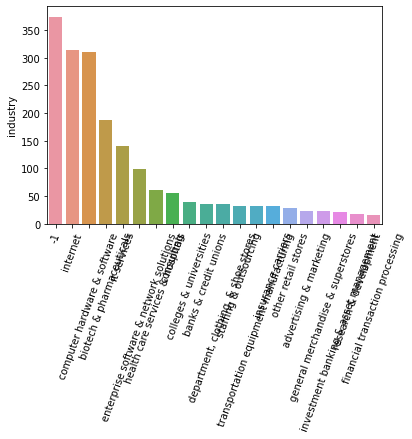

graph for sector: 
total = 20 


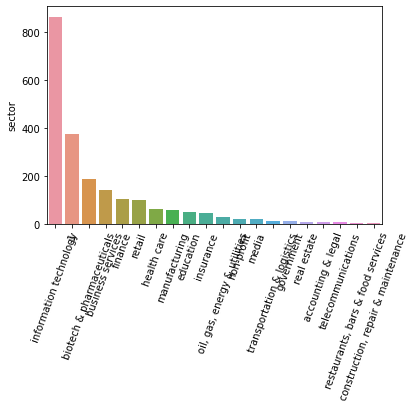

graph for city: 
total = 20 


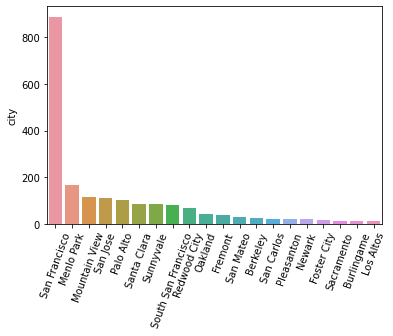

In [44]:
for i in df_cat[['company','revenue','industry','sector','city']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print("graph for %s: \ntotal = %d "% (i,len(cat_num)))
    sns.barplot(x=cat_num.index, y=cat_num)
    plt.xticks(rotation=70)
    plt.show()

In [45]:
pd.pivot_table(df, index = ['title','position'], values = 'average_salary').sort_values('average_salary',ascending = True)

,,average_salary
title,position,
analyst,Na,94.626344
Na,jr,113.333333
data scientist,jr,114.000000
Na,Na,116.796034
analyst,senior,118.485294
data engineer,Na,124.613333
data scientist,Na,132.084328
manager,Na,135.833333
Na,senior,139.614865


In [46]:
pd.set_option('display.max_rows',None)
pd.pivot_table(df, index = ['city','title'], values = 'average_salary',aggfunc = 'count').sort_values('average_salary',ascending = False)

average_salary
city                title                         
San Francisco       data scientist             434
                    mle                        147
                    analyst                    122
Menlo Park          data scientist             119
San Francisco       Na                         116
Mountain View       data scientist              64
Santa Clara         data scientist              55
Palo Alto           data scientist              52
San Jose            data scientist              48
San Francisco       data engineer               46
South San Francisco Na                          46
Sunnyvale           data scientist              40
South San Francisco data scientist              31
San Jose            Na                          31
Redwood City        Na                          29
Menlo Park          Na                          27
Palo Alto           Na                          23
Oakland             data scientist              22
Sunnyvale           mle                         20
Mountain View       Na                          20
Palo Alto           mle                         20
Mountain View       mle                         20
San Jose            mle                         18
Fremont             data scientist              18
Redwood City        data scientist              16
Sunnyvale           Na                          15
Santa Clara         Na                          14
San Francisco       manager                     14
San Mateo           data scientist              14
Santa Clara         analyst                     12
Redwood City        mle                         12
Oakland             Na                          12
Berkeley            data scientist              11
Pleasanton          data scientist              11
San Carlos          data scientist              10
San Francisco       director                    10
Los Altos           data scientist               9
Newark              data engineer                9
San Jose            analyst                      9
Foster City         Na                           9
Berkeley            Na                           9
Burlingame          data scientist               8
Mountain View       analyst                      8
Fremont             analyst                      8
Stanford            Na                           8
Fremont             Na                           7
Menlo Park          data engineer                7
Oakland             analyst                      6
San Mateo           mle                          6
San Jose            data engineer                6
Newark              Na                           6
Menlo Park          analyst                      6
San Carlos          Na                           6
Livermore           data scientist               5
Menlo Park          mle                          5
Pleasanton          mle                          5
Palo Alto           analyst                      5
Redwood City        data engineer                5
                    analyst                      4
Oakdale             Na                           4
Mountain View       data engineer                4
Sunnyvale           data engineer                4
Petaluma            Na                           4
Richmond            Na                           4
Elk Grove           data scientist               4
Milpitas            data scientist               4
Sacramento          data scientist               4
                    mle                          4
Sunnyvale           analyst                      4
San Bruno           analyst                      4
                    data scientist               4
San Mateo           Na                           4
Hercules            data scientist               4
Hayward             Na                           4
Santa Clara         manager                      4
Emeryville          Na                           4
San Mateo           data engineer                3
San Car

In [47]:
pd.pivot_table(df[df.title == 'data scientist'], index = 'city', values = 'average_salary').sort_values('average_salary',ascending = False)

,average_salary
city,
East Palo Alto,153.000000
San Bruno,151.125000
Menlo Park,147.495798
Pittsburg,146.000000
Burlingame,144.500000
Fremont,143.277778
San Francisco,142.383641
San Mateo,142.178571
Newark,141.500000


In [48]:
df.columns

Index(['company', 'job title', 'headquarters', 'salary estimate', 'job type',
       'size', 'founded', 'type', 'industry', 'sector', 'revenue',
       'job description', 'hourly', 'min_salary', 'max_salary',
       'average_salary', 'city', 'state', 'company age', 'python', 'R',
       'spark', 'aws', 'excel', 'average_revenue', 'title', 'position'],
      dtype='object')

In [49]:
df_pivots = df[['industry','sector','revenue','hourly','python','R','spark','aws','excel', 'average_salary']]

In [50]:
for i in df_pivots.columns:
    if i != 'average_salary':
        print(i)
        print(pd.pivot_table(df_pivots, index=i,values='average_salary').sort_values('average_salary',ascending = False))

industry
                                          average_salary
industry                                                
ticket sales                                  157.500000
building & personnel services                 154.500000
tv broadcast & cable networks                 152.500000
trucking                                      149.900000
internet                                      148.966454
video games                                   147.041667
stock exchanges                               146.500000
investment banking & asset management         145.500000
transportation equipment manufacturing        145.125000
brokerage services                            143.666667
other retail stores                           143.500000
lending                                       142.333333
general merchandise & superstores             141.413043
radio                                         141.375000
computer hardware & software                  140.416399
insurance carriers    

In [51]:
pd.pivot_table(df_pivots, index = 'revenue', columns ='python', values='average_salary',aggfunc= 'count')

python,0,1
revenue,,
0,762.0,226.0
1 - 2 $B,86.0,NaN
1 - 5 $M,35.0,8.0
10 - 25 $M,38.0,6.0
10+ $B,395.0,80.0
100 - 500 $M,81.0,13.0
2 - 5 $B,90.0,4.0
25 - 50 $M,50.0,1.0
5 - 10 $B,50.0,3.0


# Model Building!

Things I'm planning to do:
+choose relevant columns
+get dummy data
+train test splits
+multiple liear regression
+lasso regression
+random forest
+tune models GridsearchCV
test ensembles

In [52]:
df.columns

Index(['company', 'job title', 'headquarters', 'salary estimate', 'job type',
       'size', 'founded', 'type', 'industry', 'sector', 'revenue',
       'job description', 'hourly', 'min_salary', 'max_salary',
       'average_salary', 'city', 'state', 'company age', 'python', 'R',
       'spark', 'aws', 'excel', 'average_revenue', 'title', 'position'],
      dtype='object')

##### choose relevant columns

In [53]:
df_model = df[['average_salary','title','position','industry','sector','size','city','company age','python','R','spark','aws','excel',]]

###### get dummy data

In [54]:
df_dum= pd.get_dummies(df_model)

###### train test splits

In [55]:
X = df_dum.drop('average_salary', axis =1)
y = df_dum.average_salary.values

X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2, random_state=42)

##### multiple liear regression

In [56]:
X_sm = sm.add_constant(X)
model= sm.OLS(y, X_sm)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     29.47
Date:                Sun, 27 Nov 2022   Prob (F-statistic):               0.00
Time:                        14:28:21   Log-Likelihood:                -8520.7
No. Observations:                2093   AIC:                         1.732e+04
Df Residuals:                    1956   BIC:                         1.809e+04
Df Model:                         136                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                                72.6082      1.665     43.600      0.000      69.342      75.874
size                                                  2.0988      0.211      9.943      0.000       1.685       2.513
company age                                          -0.0154      0.014     -1.095      0.274      -0.043       0.012
python                                               -0.6330      1.123     -0.564      0.573      -2.836       1.570
R                                                    -5.3647      6.715     -0.799      0.424     -18.533       7.804
spark                                                 2.6633      1.595      1.670      0.095      -0.465       5.792
aws                                                   3.7599      1.603      2.346      0.019       0.616       6.904
excel                                                -2.5741      1.156     -2.227      0.026      -4.841      -0.307
title_Na                                              3.7433      1.076      3.478      0.001       1.633       5.854
title_analyst                                       -21.1996      1.234    -17.179      0.000     -23.620     -18.779
title_data engineer                                   6.3062      1.603      3.934      0.000       3.162       9.450
title_data scientist                                  9.3532      0.922     10.149      0.000       7.546      11.161
title_director                                       41.2426      3.903     10.567      0.000      33.588      48.897
title_manager                                        13.7256      2.571      5.339      0.000       8.684      18.767
title_mle                                            19.4369      1.185     16.407      0.000      17.113      21.760
position_Na                                          20.4875      1.534     13.351      0.000      17.478      23.497
position_jr                                          10.0930      4.093      2.466      0.014       2.067      18.119
position_senior                                      42.0278      1.604     26.201      0.000      38.882      45.174
industry_-1                                           4.4836      0.766      5.851      0.000       2.981       5.986
industry_accounting                                   8.2021      3.014      2.722      0.007       2.292      14.112
industry_advertising & marketing                     -5.9628      3.878     -1.538      0.124     -13.568       1.643
industry_automotive parts & accessories stores        3.0159     15.347      0.197      0.844     -27.082      33.114
industry_banks & credit unions                        2.4124      3.510      0.687      0.492      -4.472       9.297
industry_beauty

In [84]:
lm = LinearRegression()
lm.fit(X_train, y_train)
np.mean(cross_val_score(lm,X_train, y_train, scoring='neg_mean_absolute_error', cv=3))

-78363391.1870771

##### lasso regression

In [59]:
lm_l = Lasso()
lm_l.fit(X_train,y_train)
np.mean(cross_val_score(lm_l,X_train, y_train, scoring='neg_mean_absolute_error', cv=3))

-13.865070379143726

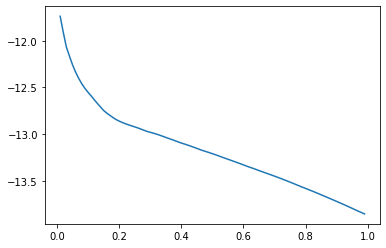

In [97]:
alpha= []
error= []

for i in range(1,100):
    alpha.append(i/100)
    lml = Lasso(alpha=(i/100))
    error.append(np.mean(cross_val_score(lml,X_train, y_train, scoring='neg_mean_absolute_error', cv=3)))

plt.plot(alpha,error)

In [62]:
err = tuple(zip(alpha,error))
df_err = pd.DataFrame(err, columns= ['alpha','error'])
df_err[df_err.error == max(df_err.error)]

,alpha,error
0,0.01,-11.739055


###### Random Forest

In [100]:
rf= RandomForestRegressor()
rf.fit(X_train,y_train)
np.mean(cross_val_score(rf,X_train,y_train,scoring = 'neg_mean_absolute_error',cv=3))

-8.954894899926208

###### tune models GridsearchCV

In [64]:
parameters = {'n_estimators': range(10,300,10), 'criterion':('squared_error','absolute_error'), 'max_features':('auto','sqrt','log2')}
gs= GridSearchCV(rf,parameters,scoring='neg_mean_absolute_error',cv=3)
gs.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'criterion': ('squared_error', 'absolute_error'),
                         'max_features': ('auto', 'sqrt', 'log2'),
                         'n_estimators': range(10, 300, 10)},
             scoring='neg_mean_absolute_error')

In [87]:
gs.best_score_

-8.814420631884493

In [88]:
gs.best_estimator_

RandomForestRegressor(max_features='sqrt', n_estimators=150)

###### Test Ensembles

In [101]:
tpred_lm = lm.predict(X_test)
tpred_lml = lm_l.predict(X_test)
tpred_rf = gs.best_estimator_.predict(X_test)

In [102]:
mean_absolute_error(y_test, tpred_lm)

94170283.68123974

In [103]:
mean_absolute_error(y_test, tpred_lml)

13.40901806956129

In [104]:
mean_absolute_error(y_test, tpred_rf)

7.066928024510383

In [105]:
mean_absolute_error(y_test,(tpred_lml+tpred_rf)/2)

9.812070620087557

## Putting the Model Into Production

In [106]:
import pickle
pickl = {'model': gs.best_estimator_}
pickle.dump( pickl, open( 'model_file' + ".p", "wb" ) )

In [107]:
file_name = "model_file.p"
with open(file_name, 'rb') as pickled:
    data = pickle.load(pickled)
    model = data['model']

In [108]:
model.predict(X_test.iloc[1,:].values.reshape(1,-1))

c:\users\se-ul\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([86.55380556])

In [109]:
list(X_test.iloc[1,:])

[6,
 114,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0]